In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.neighbors import KNeighborsClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import matplotlib.pyplot as plt

In [3]:
cin = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/CINdetails.csv')
characteristics = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/ChildCharacteristics.csv')
identifiers = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/ChildIdentifiers.csv')

print(cin.info())
print(characteristics.info())
print(identifiers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        101 non-null    int64 
 1   LAchildID         101 non-null    object
 2   CINdetailsID      101 non-null    int64 
 3   CINreferralDate   101 non-null    object
 4   ReferralSource    101 non-null    object
 5   PrimaryNeedCode   101 non-null    object
 6   CINclosureDate    63 non-null     object
 7   ReasonForClosure  63 non-null     object
 8   DateOfInitialCPC  85 non-null     object
 9   ReferralNFA       101 non-null    bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 7.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  332 non-null    int64 
 1   LAchildID   332 non-null    object
 2   Ethnicity 

In [5]:
cin.drop_duplicates('LAchildID', inplace=True)

cin['CINplan'] = 1

cin

,Unnamed: 0,LAchildID,CINdetailsID,CINreferralDate,ReferralSource,PrimaryNeedCode,CINclosureDate,ReasonForClosure,DateOfInitialCPC,ReferralNFA,CINplan
0,0,RND000215205141,1,13/07/2020,4,N6,11/06/2021,RC2,29/09/2020,False,1
1,1,RND000824303014,1,25/10/2013,6,N8,01/01/2014,RC1,13/12/2013,False,1
3,3,RND000750143123,1,14/01/2020,2A,N4,16/06/2020,RC4,20/03/2020,False,1
5,5,RND000909164501,1,13/04/2016,2B,N3,26/09/2020,RC1,16/04/2016,False,1
6,6,RND000382171815,1,02/04/2021,2A,N3,23/06/2021,RC3,02/04/2021,False,1
...,...,...,...,...,...,...,...,...,...,...,...
94,94,RND000358554892,1,15/10/2018,5A,N2,05/08/2020,RC2,29/12/2018,False,1
96,96,RND000114887428,1,23/11/2010,5B,N4,18/08/2012,RC7,19/12/2010,False,1
97,97,RND000031122698,1,12/08/2019,1A,N9,17/09/2021,RC7,05/10/2019,False,1
98,98,RND000875696504,1,18/05/2018,6,N6,27/05/2018,RC5,NaN,False,1


In [13]:
df = characteristics.merge(identifiers, how='left', on='LAchildID')
df = df.merge(cin, how='left', on='LAchildID')

df['CINplan'] = df['CINplan'].fillna(0)

df['Age'] = pd.to_datetime('today') - pd.to_datetime(df['PersonBirthDate'], format="%Y-%m-%d")

df['Age'] = df['Age']/pd.Timedelta(days=365)

cols_to_keep = ['CINplan', 'Age', 'GenderCurrent', 'Ethnicity']

df = df[cols_to_keep]

df

,CINplan,Age,GenderCurrent,Ethnicity
0,1.0,4.831584,1,WIRT
1,1.0,13.448022,9,WROM
2,1.0,7.332954,1,AOTH
3,1.0,10.009666,0,MWBC
4,1.0,5.028844,2,APKN
...,...,...,...,...
327,0.0,14.253502,2,WOTH
328,0.0,6.143913,2,WROM
329,0.0,2.820625,1,BCRB
330,0.0,11.206926,2,AIND


In [14]:
def ethnic_check(ethnicity):
    letter = ethnicity[0]
    if letter == 'W':
        return 'white'
    if letter == 'B':
        return 'black'
    if letter == 'M':
        return 'mixed'
    if (letter == 'A') | (letter == 'C'):
        return 'asian'
    else:
        return 'unknown'
    

df['Ethnicity'] = df['Ethnicity'].apply(ethnic_check)

df

,CINplan,Age,GenderCurrent,Ethnicity
0,1.0,4.831584,1,white
1,1.0,13.448022,9,white
2,1.0,7.332954,1,asian
3,1.0,10.009666,0,mixed
4,1.0,5.028844,2,asian
...,...,...,...,...
327,0.0,14.253502,2,white
328,0.0,6.143913,2,white
329,0.0,2.820625,1,black
330,0.0,11.206926,2,asian


In [15]:
df['GenderCurrent'] = df['GenderCurrent'].map({1:'male',
                                               2:'female',
                                               0:'other',
                                               9:'other'})

df

,CINplan,Age,GenderCurrent,Ethnicity
0,1.0,4.831584,male,white
1,1.0,13.448022,other,white
2,1.0,7.332954,male,asian
3,1.0,10.009666,other,mixed
4,1.0,5.028844,female,asian
...,...,...,...,...
327,0.0,14.253502,female,white
328,0.0,6.143913,female,white
329,0.0,2.820625,male,black
330,0.0,11.206926,female,asian


In [17]:
df_encoded = pd.get_dummies(df[['GenderCurrent', 'Ethnicity']])

cin_age = df[['Age', 'CINplan']]

full_df = cin_age.merge(df_encoded, how='left', left_index=True, right_index=True)

full_df

,Age,CINplan,GenderCurrent_female,GenderCurrent_male,GenderCurrent_other,Ethnicity_asian,Ethnicity_black,Ethnicity_mixed,Ethnicity_unknown,Ethnicity_white
0,4.831584,1.0,False,True,False,False,False,False,False,True
1,13.448022,1.0,False,False,True,False,False,False,False,True
2,7.332954,1.0,False,True,False,True,False,False,False,False
3,10.009666,1.0,False,False,True,False,False,True,False,False
4,5.028844,1.0,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
327,14.253502,0.0,True,False,False,False,False,False,False,True
328,6.143913,0.0,True,False,False,False,False,False,False,True
329,2.820625,0.0,False,True,False,False,True,False,False,False
330,11.206926,0.0,True,False,False,True,False,False,False,False


In [19]:
X = full_df.drop('CINplan', axis=1)
y = full_df['CINplan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

52     1.0
56     1.0
55     1.0
191    0.0
145    0.0
      ... 
116    0.0
255    0.0
108    0.0
258    0.0
221    0.0
Name: CINplan, Length: 67, dtype: float64

In [21]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7014925373134329


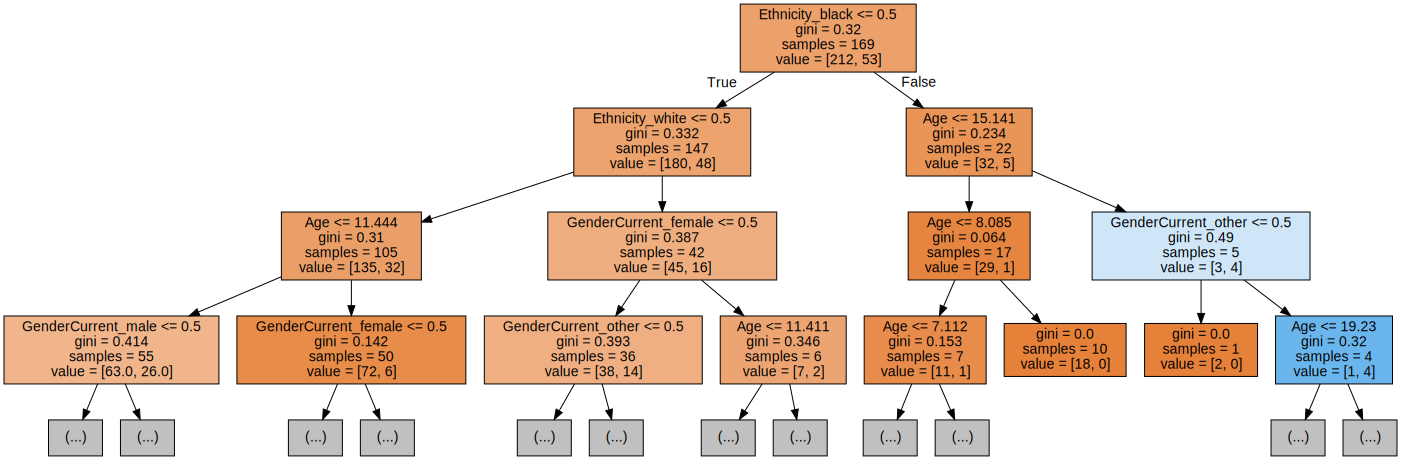

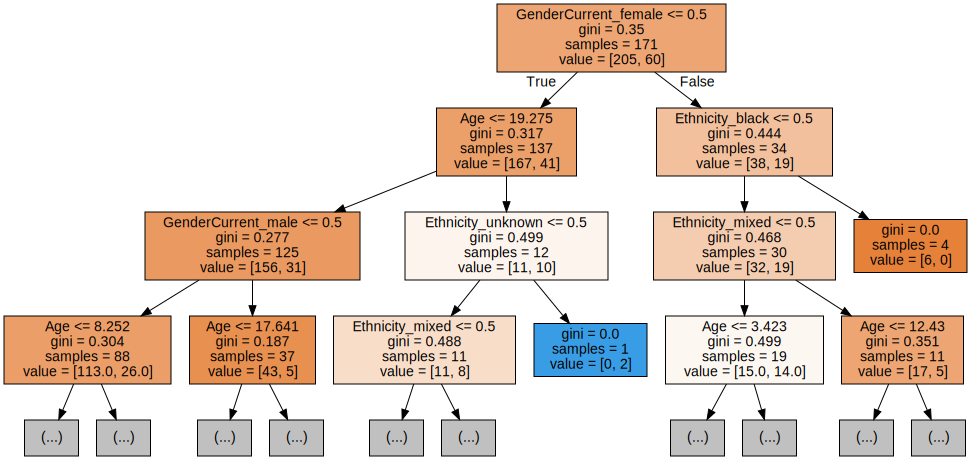

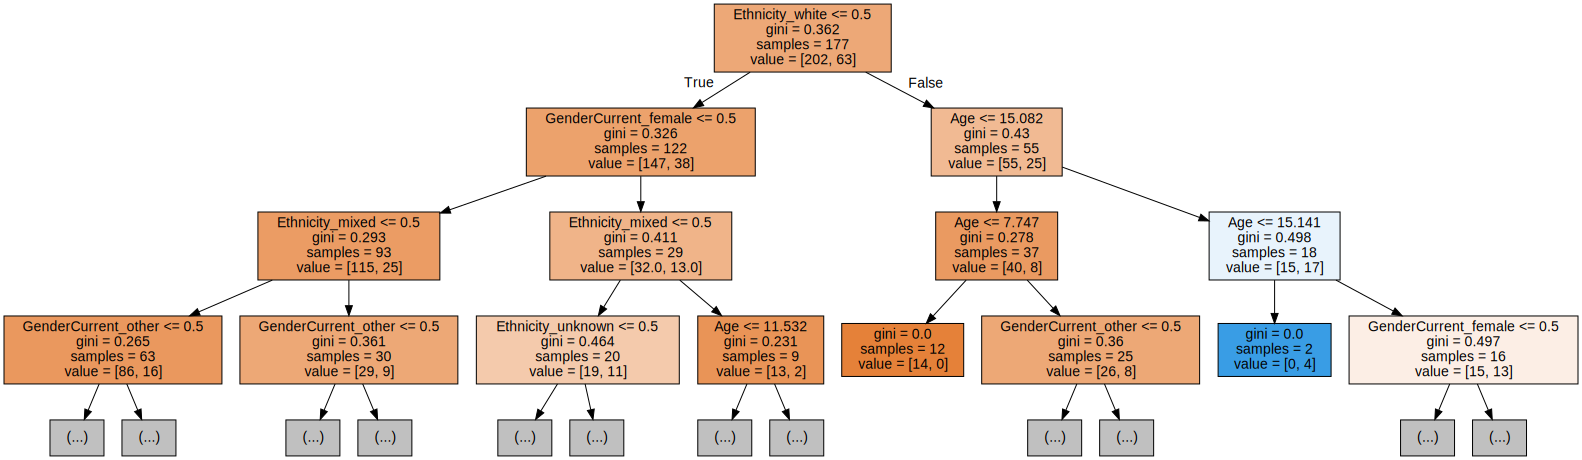

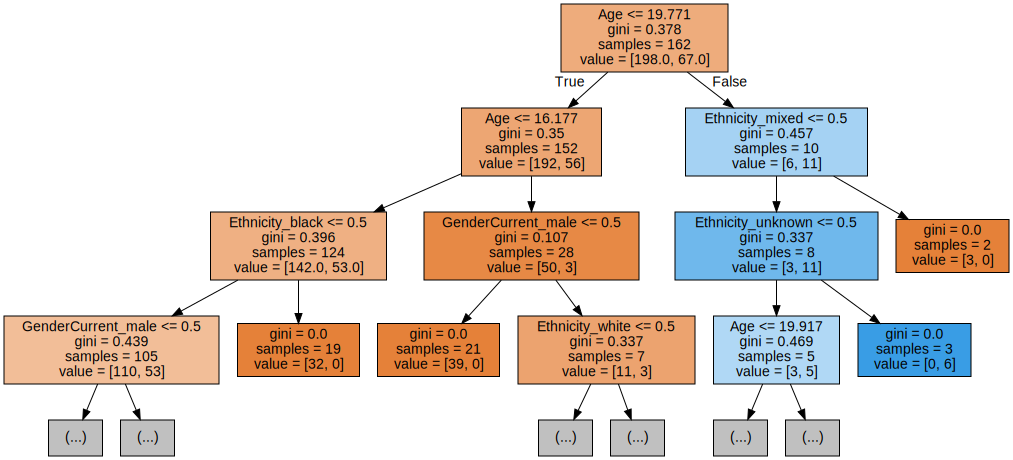

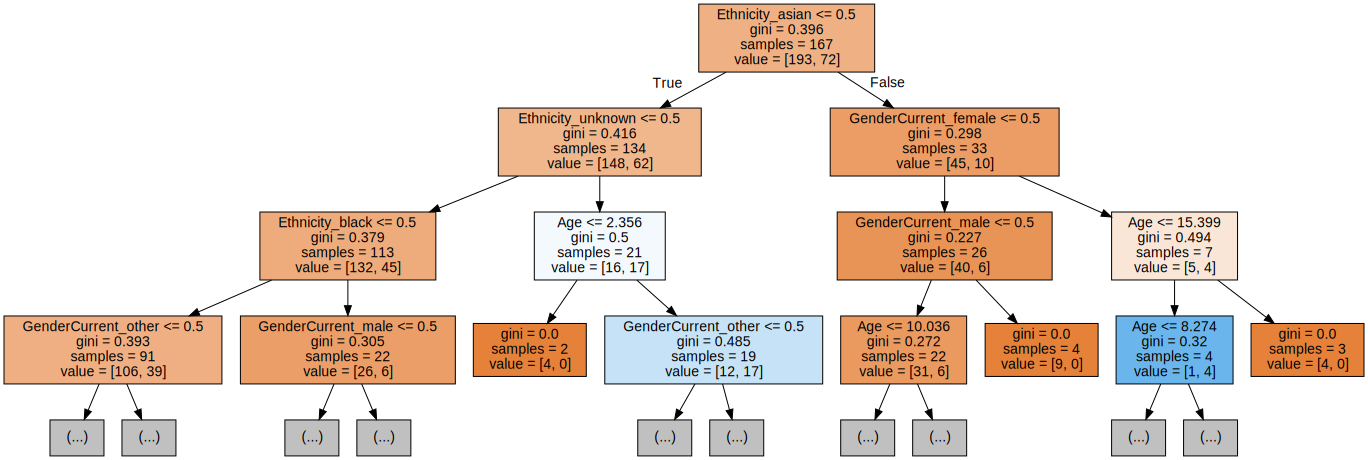

In [23]:
    
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                            feature_names=X.columns,
                            filled=True,
                            max_depth=3)
    graph = graphviz.Source(dot_data)
    display(graph)

<Axes: xlabel='feature'>

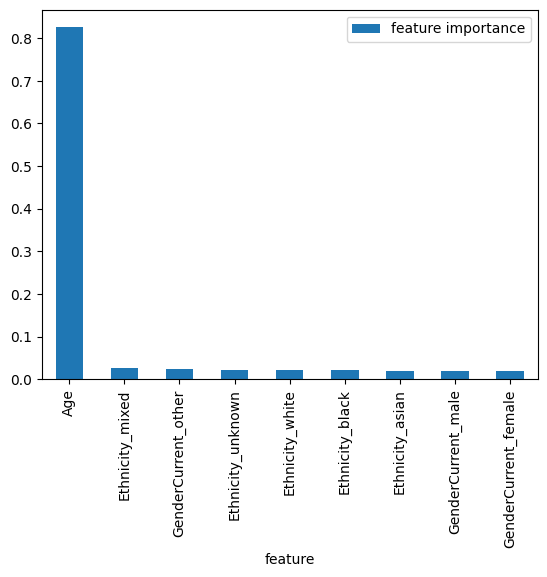

In [26]:
feature_importance_df = pd.DataFrame({'feature importance': rf.feature_importances_,
                                      'feature':X.columns})\
                                      .set_index('feature')\
                                      .sort_values('feature importance', ascending=False)

feature_importance_df.plot.bar()



In [31]:
param_dist = {'n_estimators':randint(50,500),
              'max_depth':randint(1,20)}

new_rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(new_rf,
                                 param_distributions=param_dist,
                                 n_iter=10)

rand_search.fit(X_train, y_train)

best_rf = rand_search.best_params_

best_rf


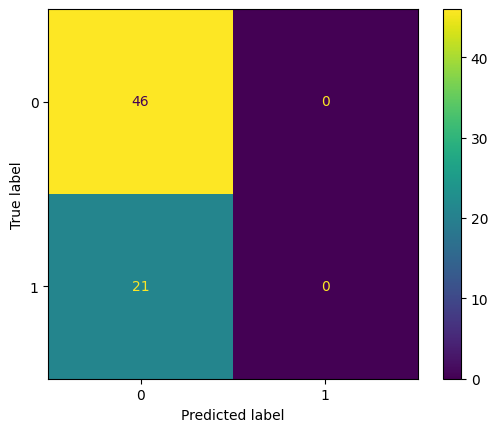

In [36]:
new_rf = rand_search.best_estimator_
y_pred = new_rf.predict(X_test)

# print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()